# 06 Classification dengan KNN (K Nearest Neighbour)

Referensi: [https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

## Sample Dataset

In [1]:
import pandas as pd

sensus = {'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 178], 
          'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67], 
          'jk': ['pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita']}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


## Visualisasi Data

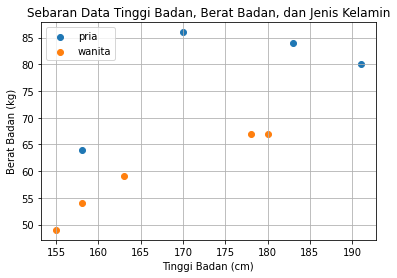

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

## Classification dengan KNN

### Preprocess Dataset

In [3]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:\n{X_train}')
print(f'y_train: {y_train}')

X_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]
y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


### Training KNN Classification Model

In [4]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Prediksi Jenis Kelamin

In [5]:
tinggi_badan = 155
berat_badan = 70
X_predict = np.array([tinggi_badan, berat_badan]).reshape(1,-1)
X_predict

array([[155,  70]])

In [6]:
model.predict(X_predict)

array(['wanita'], dtype=object)

### Visualisasi Nearest Neighbour

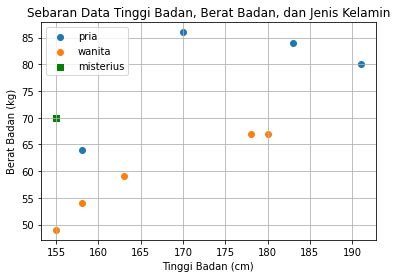

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
            berat_badan,
            marker='s',
            color='green',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

### Kalkulasi Distance


$distance = \sqrt{ (t_1 - t_2)^2 + (b_1 - b_2)^2 }$

In [8]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [9]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]])

In [10]:
def jarak(data1, data2):
    return sum([(d1-d2)**2 for d1, d2 in zip(data1, data2)])

data_jarak = [jarak(misterius, d) for d in X_train]
data_jarak

[45, 481, 980, 1396, 441, 185, 634, 265, 538]

In [11]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,45
5,163,59,wanita,185
7,158,54,wanita,265
4,155,49,wanita,441
1,170,86,pria,481
8,178,67,wanita,538
6,180,67,wanita,634
2,183,84,pria,980
3,191,80,pria,1396


### Evaluasi KNN Classification Model

In [12]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = np.array(['pria', 'pria', 'wanita', 'wanita'])

print(f'X_test:\n{X_test}')
print(f'y_test: {y_test}')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]
y_test: ['pria' 'pria' 'wanita' 'wanita']


In [13]:
y_pred = model.predict(X_test)
y_pred

array(['wanita', 'pria', 'wanita', 'wanita'], dtype=object)

#### Accuracy

Accuracy is the proportion of test instances that were classified correctly.

$accuracy = \frac{tp\ +\ tn}{tp\ +\ tn\ +\ fp\ +\ fn}$

Referensi: [https://en.wikipedia.org/wiki/Precision_and_recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [14]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.75


#### Precission 

Precision is the proportion of test instances that were predicted to be positive that are truly positive. 

$precission = \frac{tp}{tp\ +\ fp}$

Referensi: [https://en.wikipedia.org/wiki/Precision_and_recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [15]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test)

binarised_y_test = lb.transform(y_test)
print(f'y_test: {y_test}')
print(f'binarised_y_test:\n{binarised_y_test}\n')

binarised_y_pred = lb.transform(y_pred)
print(f'y_pred: {y_pred}')
print(f'binarised_y_pred:\n{binarised_y_pred}')

y_test: ['pria' 'pria' 'wanita' 'wanita']
binarised_y_test:
[[0]
 [0]
 [1]
 [1]]

y_pred: ['wanita' 'pria' 'wanita' 'wanita']
binarised_y_pred:
[[1]
 [0]
 [1]
 [1]]


In [16]:
from sklearn.metrics import precision_score

prec = precision_score(binarised_y_test, binarised_y_pred)

print(f'Precission: {prec}')

Precission: 0.6666666666666666


#### Recall 

Recall is the proportion of truly positive test instances that were predicted to be positive.

$recall = \frac{tp}{tp\ + \ fn}$

Referensi: [https://en.wikipedia.org/wiki/Precision_and_recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [17]:
from sklearn.metrics import recall_score

rec = recall_score(binarised_y_test, binarised_y_pred)

print(f'Recall: {rec}')

Recall: 1.0


#### F1 Score 

The F1 score is the harmonic mean of precision and recall.

$F1 = 2 \times \frac{precission\ \times \ recall}{precission\ + \ recall}$

Referensi: [https://en.wikipedia.org/wiki/Precision_and_recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [18]:
from sklearn.metrics import f1_score

f1 = f1_score(binarised_y_test, binarised_y_pred)

print(f'F1-score: {f1}')

F1-score: 0.8


#### Classification Report

In [19]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report: {cls_report}')

Classification Report:               precision    recall  f1-score   support

        pria       1.00      0.50      0.67         2
      wanita       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



#### Matthews Correlation Coefficient (MCC)

- MCCis an alternative to the F1 score for measuring the performance of binary classifiers. 
- A perfect classifier's MCC is 1. 
- A trivial classifier that predicts randomly will score 0, and a perfectly wrong classifier will score -1.

$MCC = \frac{tp\ \times\ tn\ + fp\ \times\ fn}{ \sqrt{ (tp\ +\ fp)\ \times\ (tp\ +\ fn)\ \times\ (tn\ +\ fp)\ \times\ (tn\ +\ fn)  }  }$

Referensi: [https://en.wikipedia.org/wiki/Matthews_correlation_coefficient](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient)

In [20]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(binarised_y_test, binarised_y_pred)

print(f'MCC: {mcc}')

MCC: 0.5773502691896258
